# PHY 266 HW 2

In [1]:
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt

## Prb 1. Random coordinates on a sphere

### 1 a) As the object is randomly distributed that means the probabilty of detecting it any where in the sky is same. So we can expect an uniform distribution of $\alpha$ ranging from 0-360 degree or U(0, 360).


### 1 b) Similarly the distribution of $\delta$ is also an uniform distribution and ranging from -90 to 90 or U(-90, 90).  Now the CDF of $\delta$ is $F(\delta)= \int_{-\infty}^{\delta} f(\delta')d\delta'$. The PDF of $\delta$ is $f(\delta) = \frac{1}{b-a} = \frac{1}{180}$ when the PDF is uniform distribution of U(a,b). Then 
$$ 
\begin{align}
F(\delta) &= \int_{-\infty}^{\delta} \frac{1}{180}d\delta' \\ 
          &= \frac{1}{180} \int_{-90}^{\delta} d\delta' \\
          &= \frac{\delta+90}{180}
\end{align}$$

### 1 c) We have the equation for CDF of $\delta$. Then we can draw samples from U(0,1) which will be treated as F($\delta$) values and using the equation above we can find out the corresponding values of $\delta$.

### Similarly we can derive the CDF of $\alpha$ and use the above mentioned procedure to convert samples drawn from U(0,1) to the values of $\alpha$. The CDF of $\alpha$ is                                                                       $$ \begin{align}
F(\alpha) &= \int_{-\infty}^{\alpha} \frac{1}{360}d\alpha' \\ 
&= \frac{1}{360} \int_{0}^{\alpha} d\alpha' \\     
&= \frac{\alpha}{360} 
\end{align}$$

In [37]:
cdf_val = np.random.uniform(0, 1, size=10000)

dec = 180.0 * cdf_val - 90.0
ra = cdf_val * 360.0

### 1 d) plot to check that the derived values for right ascension  and declination above are indeed uniformly distributed over their respective range.

Text(0.5, 0, '$\\alpha$ values')

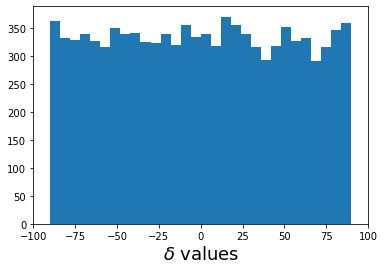

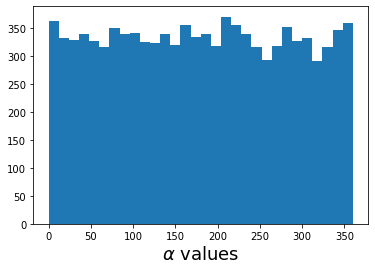

In [42]:
plt.hist(dec, bins=30)
plt.xlabel(r'$\delta$ values', fontdict={'fontsize':18})
plt.xlim(-100,100)
plt.figure()
plt.hist(ra, bins=30)
plt.xlabel(r'$\alpha$ values', fontdict={'fontsize':18})

## Prb 2. Expected values

### 2 a)

In [16]:
np.random.seed(12345)
x = np.random.uniform(-0.5, 0.5, size=100000)
y = np.random.uniform(-0.5, 0.5, size=100000)

(array([0.01758168, 0.0653034 , 0.10322961, 0.14391865, 0.18234719,
        0.24036675, 0.26774394, 0.28959546, 0.33179151, 0.38152256,
        0.41417426, 0.45687264, 0.50760835, 0.5490509 , 0.55859524,
        0.60330295, 0.66333185, 0.70728606, 0.71657924, 0.77359413,
        0.80398533, 0.85572571, 0.91399644, 0.92831295, 1.01546788,
        0.98959768, 0.96548566, 0.88862858, 0.86326072, 0.80398533,
        0.77560346, 0.74470993, 0.69949989, 0.67865303, 0.63042898,
        0.5824561 , 0.52669704, 0.51012002, 0.49630584, 0.41316959,
        0.36871305, 0.33932652, 0.29436764, 0.26799511, 0.23182707,
        0.17908202, 0.1647655 , 0.11704379, 0.06781507, 0.02587019]),
 array([-0.9986376 , -0.95882344, -0.91900928, -0.87919512, -0.83938096,
        -0.7995668 , -0.75975264, -0.71993848, -0.68012432, -0.64031016,
        -0.600496  , -0.56068184, -0.52086769, -0.48105353, -0.44123937,
        -0.40142521, -0.36161105, -0.32179689, -0.28198273, -0.24216857,
        -0.20235441, -0.16

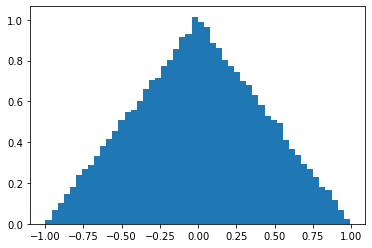

In [17]:
plt.hist(x+y, bins=50, density=True)

## Prb 4. Magnitudes: a common transformation

### 4 a)  We can calculate the magnitude of the galaxy using the following equation 
$$ m_{g} = m_{\ast} - 2.5\log \frac{f_g}{f_{\ast}} $$
### where $m_{g}$ is the magnitude of the galaxy, $m_{\ast}$ is the magnitude of the star, $f_g$  and $f_{\ast}$ are the pixel value of the galaxy and star respectively. As the flux is a linear measure of the pixel value then the ratio of the pixel values can be used as the ratio of the flux.

### 4 b) If we double the exposure time then the pixel values of both the galaxy and star would get doubled. As we are working with their ratio then we don't need to add any dependence on exposure time.

### 4 c) We can start with the fact that $\frac{d\log x}{dx} = \frac{1}{x}$. Then 
$$\begin{align} 
\int d(\log x) &= \int \frac{dx}{x} \\
         \log x &= \int \frac{dx}{x} \\
 \end{align}$$ 
### Now $\frac{dx}{x}$ is a dimensionless ratio. So we can say that logarithm of any quantity x can be expressed as the sum of some dimensionless ratios or numbers. Or logarithm of anything is dimensionless.

### 4 d) The uncertainty on magnitude of galaxy $\sigma_{mg}$ is related to other variable in the following way $$\begin{align}
\sigma_{m_g}^2 &= |\frac{\partial m_{g}}{\partial f_g} |^2 \sigma_{f_g}^2 \\
         &= (-2.5\frac{1}{f_g})^2 \sigma_{f_g}^2 \\
 \sigma_{m_g} &= \pm 2.5 \frac{\sigma_{f_g}}{f_g}
\end{align}$$

### 4 e) 